In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\nikhil\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Nikhil\\AppData\\Local\\Temp\\pip-install-bih_32ve\\fbprophet_9c0a36177e6149049892311d14fe7a36\\setup.py'"'"'; __file__='"'"'C:\\Users\\Nikhil\\AppData\\Local\\Temp\\pip-install-bih_32ve\\fbprophet_9c0a36177e6149049892311d14fe7a36\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Nikhil\AppData\Local\Temp\pip-wheel-lcj17mbs'
       cwd: C:\Users\Nikhil\AppData\Local\Temp\pip-install-bih_32ve\fbprophet_9c0a36177e6149049892311d14fe7a36\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR 

ModuleNotFoundError: No module named 'fbprophet'

In [4]:
#from google.colab import files
#uploaded = files.upload()
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("bitcoin daily data.csv")
data.set_index('Date', drop=True, inplace=True)
data.head()



,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
29-04-2013,1,Bitcoin,BTC,147.49,134.00,134.44,144.54,0.0,1.603769e+09
30-04-2013,2,Bitcoin,BTC,146.93,134.05,144.00,139.00,0.0,1.542813e+09
01-05-2013,3,Bitcoin,BTC,139.89,107.72,139.00,116.99,0.0,1.298955e+09
02-05-2013,4,Bitcoin,BTC,125.60,92.28,116.38,105.21,0.0,1.168517e+09
03-05-2013,5,Bitcoin,BTC,108.13,79.10,106.25,97.75,0.0,1.085995e+09


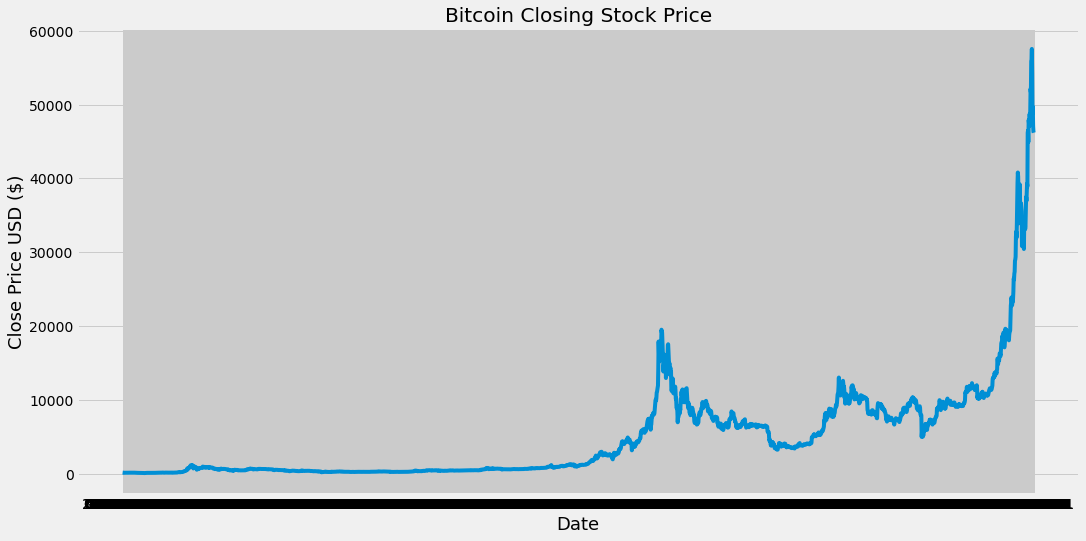

In [5]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Bitcoin Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [6]:
btc = data[["Close"]]

print(btc.head())

             Close
Date              
29-04-2013  144.54
30-04-2013  139.00
01-05-2013  116.99
02-05-2013  105.21
03-05-2013   97.75


In [7]:
futureDays = 120

In [8]:
btc["Prediction"] = btc[["Close"]].shift(-futureDays)

print(btc.head(20))
print(btc.tail(40))

btc.describe(include='all')

             Close  Prediction
Date                          
29-04-2013  144.54      126.50
30-04-2013  139.00      122.62
01-05-2013  116.99      122.39
02-05-2013  105.21      133.49
03-05-2013   97.75      135.35
04-05-2013  112.50      138.34
05-05-2013  115.91      135.85
06-05-2013  112.30      136.77
07-05-2013  111.50      126.74
08-05-2013  113.57      126.43
09-05-2013  112.67      119.15
10-05-2013  117.20      124.15
11-05-2013  115.24      121.66
12-05-2013  115.00      127.11
13-05-2013  117.98      125.91
14-05-2013  111.50      135.25
15-05-2013  114.22      133.13
16-05-2013  118.76      134.98
17-05-2013  123.01      129.22
18-05-2013  123.50      130.37
               Close  Prediction
Date                            
19-01-2021  36069.81         NaN
20-01-2021  35547.75         NaN
21-01-2021  30825.70         NaN
22-01-2021  33005.76         NaN
23-01-2021  32067.64         NaN
24-01-2021  32289.38         NaN
25-01-2021  32366.39         NaN
26-01-2021  32569.85 

<ipython-input-8-c01df8b9d4ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["Prediction"] = btc[["Close"]].shift(-futureDays)


,Close,Prediction
count,2862.000000,2742.000000
mean,4852.092537,5059.721408
std,6975.105853,7053.617615
min,68.430000,114.130000
25%,420.992500,447.725000
50%,1182.810000,2215.415000
75%,7926.692500,8127.220000
max,57539.940000,57539.940000


In [10]:
import numpy as np
x = np.array(btc.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[  144.54]
 [  139.  ]
 [  116.99]
 ...
 [13271.29]
 [13437.88]
 [13546.52]]


In [11]:
y = np.array(btc["Prediction"])[:-futureDays]
print(y)

[  126.5    122.62   122.39 ... 47093.85 46339.76 46188.45]


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


print(xtrain)

[[  454.93]
 [ 8108.12]
 [ 6859.08]
 ...
 [ 8550.76]
 [10366.7 ]
 [  382.49]]


In [13]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

#using the support vector model

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
svmReg = regressor.fit(xtrain,ytrain)

In [14]:
xfuture = btc.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[ 9087.3 ]
 [ 9132.49]
 [ 9073.94]
 [ 9375.47]
 [ 9252.28]
 [ 9428.33]
 [ 9277.97]
 [ 9278.81]
 [ 9240.35]
 [ 9276.5 ]
 [ 9243.61]
 [ 9243.21]
 [ 9192.84]
 [ 9132.23]
 [ 9151.39]
 [ 9159.04]
 [ 9185.82]
 [ 9164.23]
 [ 9374.89]
 [ 9525.36]
 [ 9581.07]
 [ 9536.89]
 [ 9677.11]
 [ 9905.17]
 [10990.87]
 [10912.82]
 [11100.47]
 [11111.21]
 [11323.47]
 [11759.59]
 [11053.61]
 [11246.35]
 [11205.89]
 [11747.02]
 [11779.77]
 [11601.47]
 [11754.05]
 [11675.74]
 [11878.11]
 [11410.53]
 [11584.93]
 [11784.14]
 [11768.87]
 [11865.7 ]
 [11892.8 ]
 [12254.4 ]
 [11991.23]
 [11758.28]
 [11878.37]
 [11592.49]
 [11681.83]
 [11664.85]
 [11774.6 ]
 [11366.14]
 [11488.36]
 [11323.4 ]
 [11542.5 ]
 [11506.87]
 [11711.51]
 [11680.82]
 [11970.48]
 [11414.03]
 [10245.3 ]
 [10511.81]
 [10169.57]
 [10280.35]
 [10369.56]
 [10131.52]
 [10242.35]
 [10363.14]
 [10400.91]
 [10442.17]
 [10323.76]
 [10680.84]
 [10796.95]
 [10974.9 ]
 [10948.99]
 [10944.59]
 [11094.35]
 [10938.27]
 [10462.26]
 [10538.46]
 [10246.19]
 [10

In [30]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)
r2_score = (xfuture,linearPrediction)
print(r2_score*100,'%')

Decision Tree prediction = [13780.99 16317.81 13550.49 13950.3  14133.71 15579.85 15565.88 14833.75
 15479.57 15332.32 15701.34 15701.34 13654.22 16317.81 16068.14 15955.59
 10760.07 17645.41 17804.01 17817.09 18621.31 18642.23  9332.34 18364.12
 19107.46 18732.12 17150.62 17108.4  17717.42 18177.48 19625.84 18803.
  9235.35 49199.87 18058.9   8418.99 19345.12 19191.63 18321.14 18553.92
 23869.83 18058.9  23783.03 19142.38 19246.64 19417.08 28840.95 22805.16
 23137.96 23869.83 23477.3  22803.08 23783.03  7587.34  6385.82 24664.79
 46481.1   6614.18 23477.3  27362.44 28840.95 18553.92 29374.15 32127.27
 10844.64 31971.91 33992.43 36824.36 39371.04 40797.61 40254.55 36069.81
  9321.78 33922.96  9205.73 39187.33  8041.78  8041.78 35791.28  8041.78
 36069.81 35547.75 30825.7  33005.76 32067.64 33005.76 32366.39  8222.08
 30432.55 32366.39 34316.39 34269.52 33114.36 36926.06  9205.73  8309.29
 36926.06 18732.12  6844.23  7472.59  7278.12 46481.1  44918.18 47909.33
  8368.83 47105.52 48717.2

In [29]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)
r2_score = linear.score(xfuture,linearPrediction)
print(r2_score*100,'%')

Linear regression Prediction = [11006.06619039 11057.76958219 10990.78056714 11335.77113429
 11194.82533133 11396.25002985 11224.21812034 11225.17919246
 11181.17581895 11222.53624413 11184.90569409 11184.4480407
 11126.81803749 11057.47210748 11079.39370489 11088.14632599
 11118.78622048 11094.08437873 11335.10753687 11507.26530107
 11571.00497704 11520.45716005 11680.88755612 11941.81863675
 13184.00435211 13094.70473427 13309.40138112 13321.68937466
 13564.54314637 14063.52263811 13255.78728642 13476.30757267
 13430.01593221 14049.14088031 14086.61125166 13882.61225281
 14057.18413865 13967.58704611 14199.12533773 13664.15140683
 13863.68828511 14091.61111495 14074.14019677 14184.92664129
 14215.9326585  14629.65132358 14328.54971659 14062.02382325
 14199.42281244 13872.3379342  13974.55481898 13955.12743255
 14080.69608159 13613.36332181 13753.1993153  13564.46305702
 13815.14270171 13774.37722594 14008.51270056 13973.39924417
 14304.80894695 13668.15587399 12330.97275609 12635.895

In [17]:
svmPrediction = svmReg.predict(xfuture)
print("SVM regression Prediction =",svmPrediction)

SVM regression Prediction = [3309.62493745 3307.66819531 3310.1863811  3295.67525934 3302.05952505
 3292.75139805 3300.77878282 3300.73644958 3302.64504919 3300.85279671
 3302.48563232 3302.50521633 3304.91813126 3307.67970628 3306.82365738
 3306.47747114 3305.24597423 3306.24118589 3295.70673689 3287.10670704
 3283.70806603 3286.41260116 3277.58876509 3261.81500238 3168.45415074
 3175.89350213 3157.8877181  3156.84547099 3136.04113912 3092.56691568
 3162.42142001 3143.64108596 3147.61074844 3093.82484175 3090.54757713
 3108.38561923 3093.12131754 3100.95790968 3080.71335574 3127.41681903
 3110.03853135 3090.11032099 3091.63827208 3081.95353635 3079.24574856
 3043.38495181 3069.42716346 3092.69800966 3080.68737629 3109.28309923
 3100.34856502 3102.04744712 3091.06489746 3131.8195013  3119.67490056
 3136.04805559 3114.27581787 3117.83009577 3097.37855579 3100.44962416
 3071.49448952 3127.06925145 3235.40141491 3212.67413606 3241.55363573
 3232.5055778  3225.00321064 3244.58893865 3235.6

<ipython-input-18-f276c9591b14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


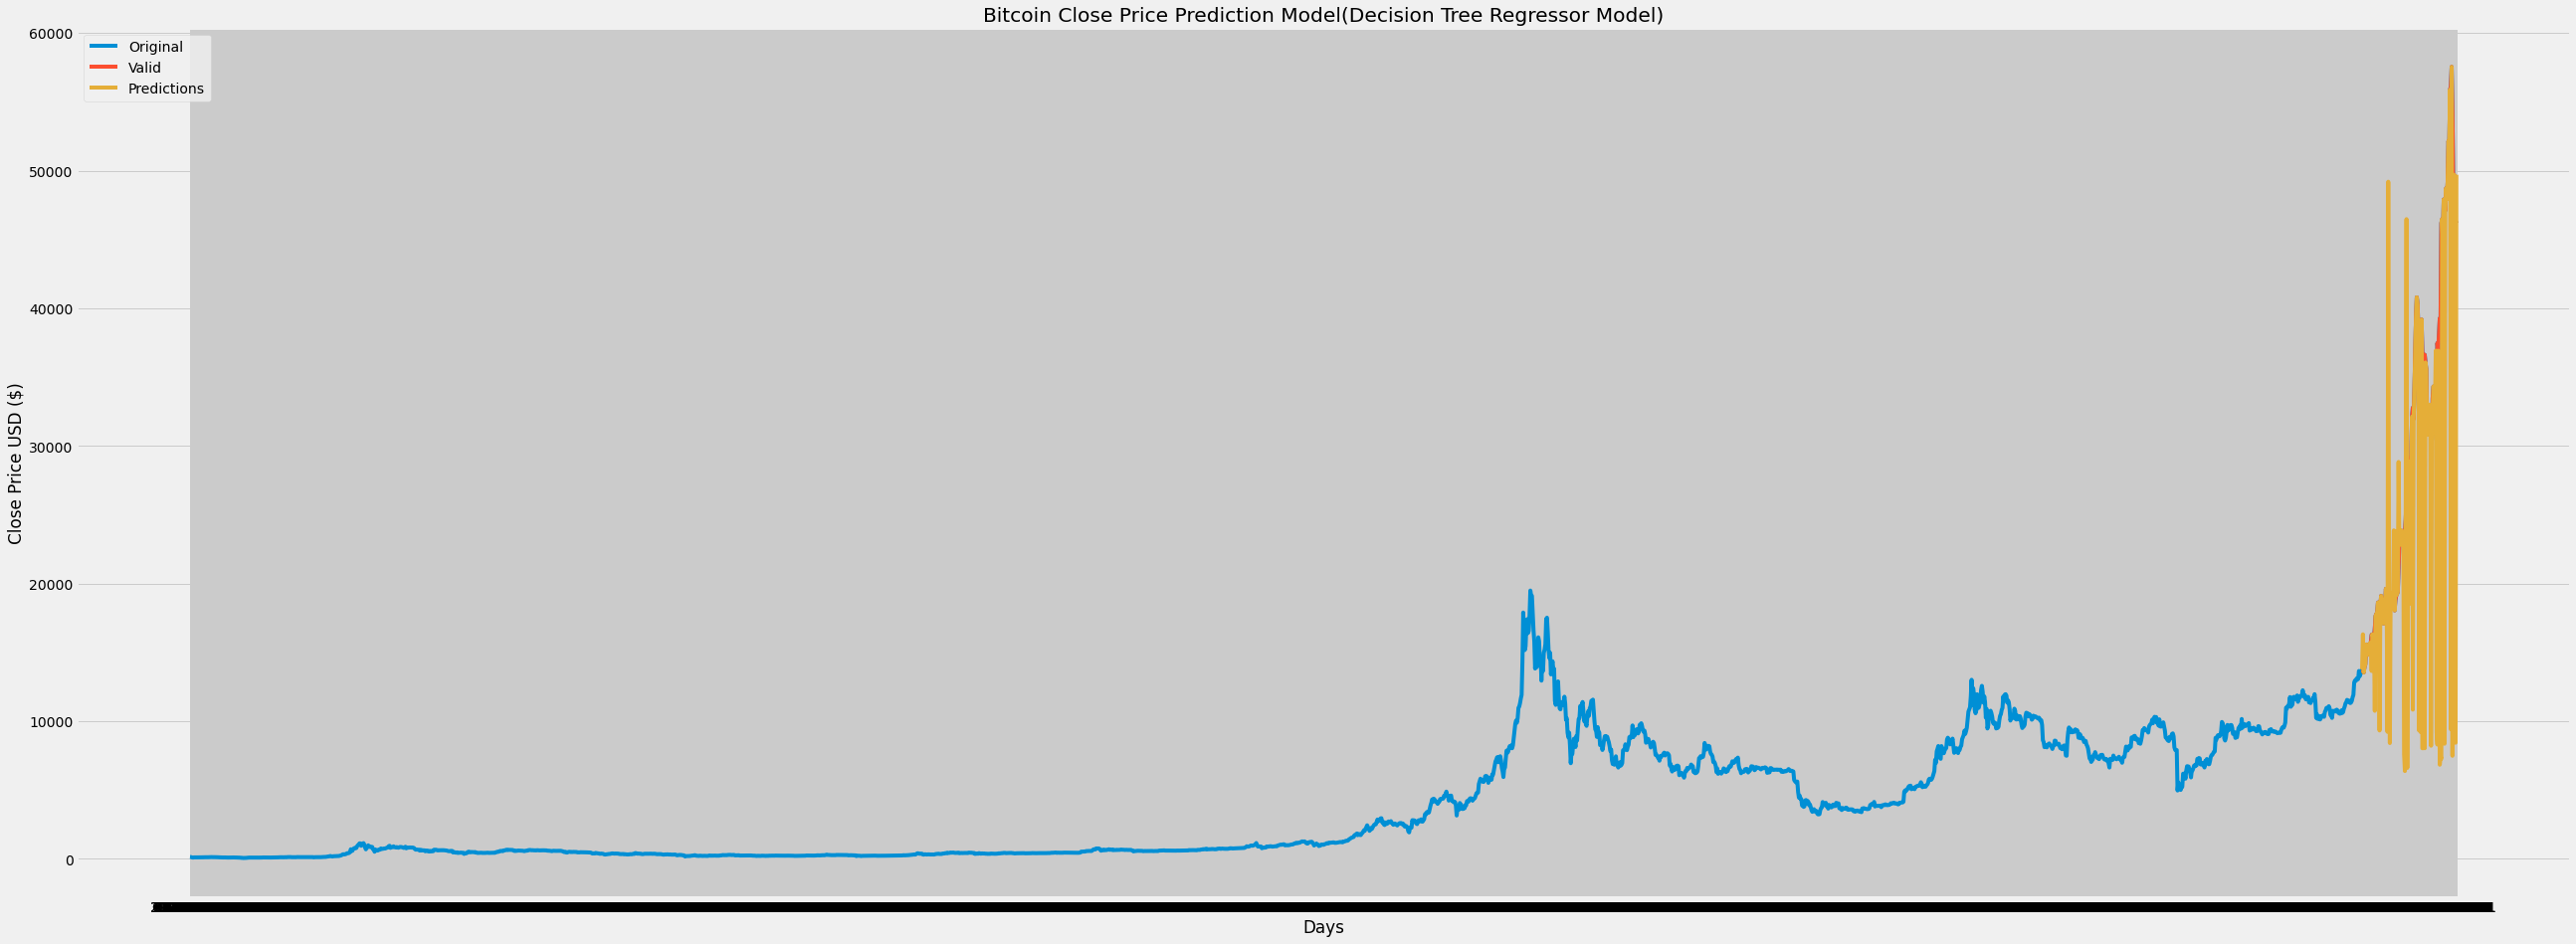

In [18]:
predictions = treePrediction
valid = btc[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Bitcoin Close Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(btc["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

<ipython-input-19-cb52b2dfe9c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


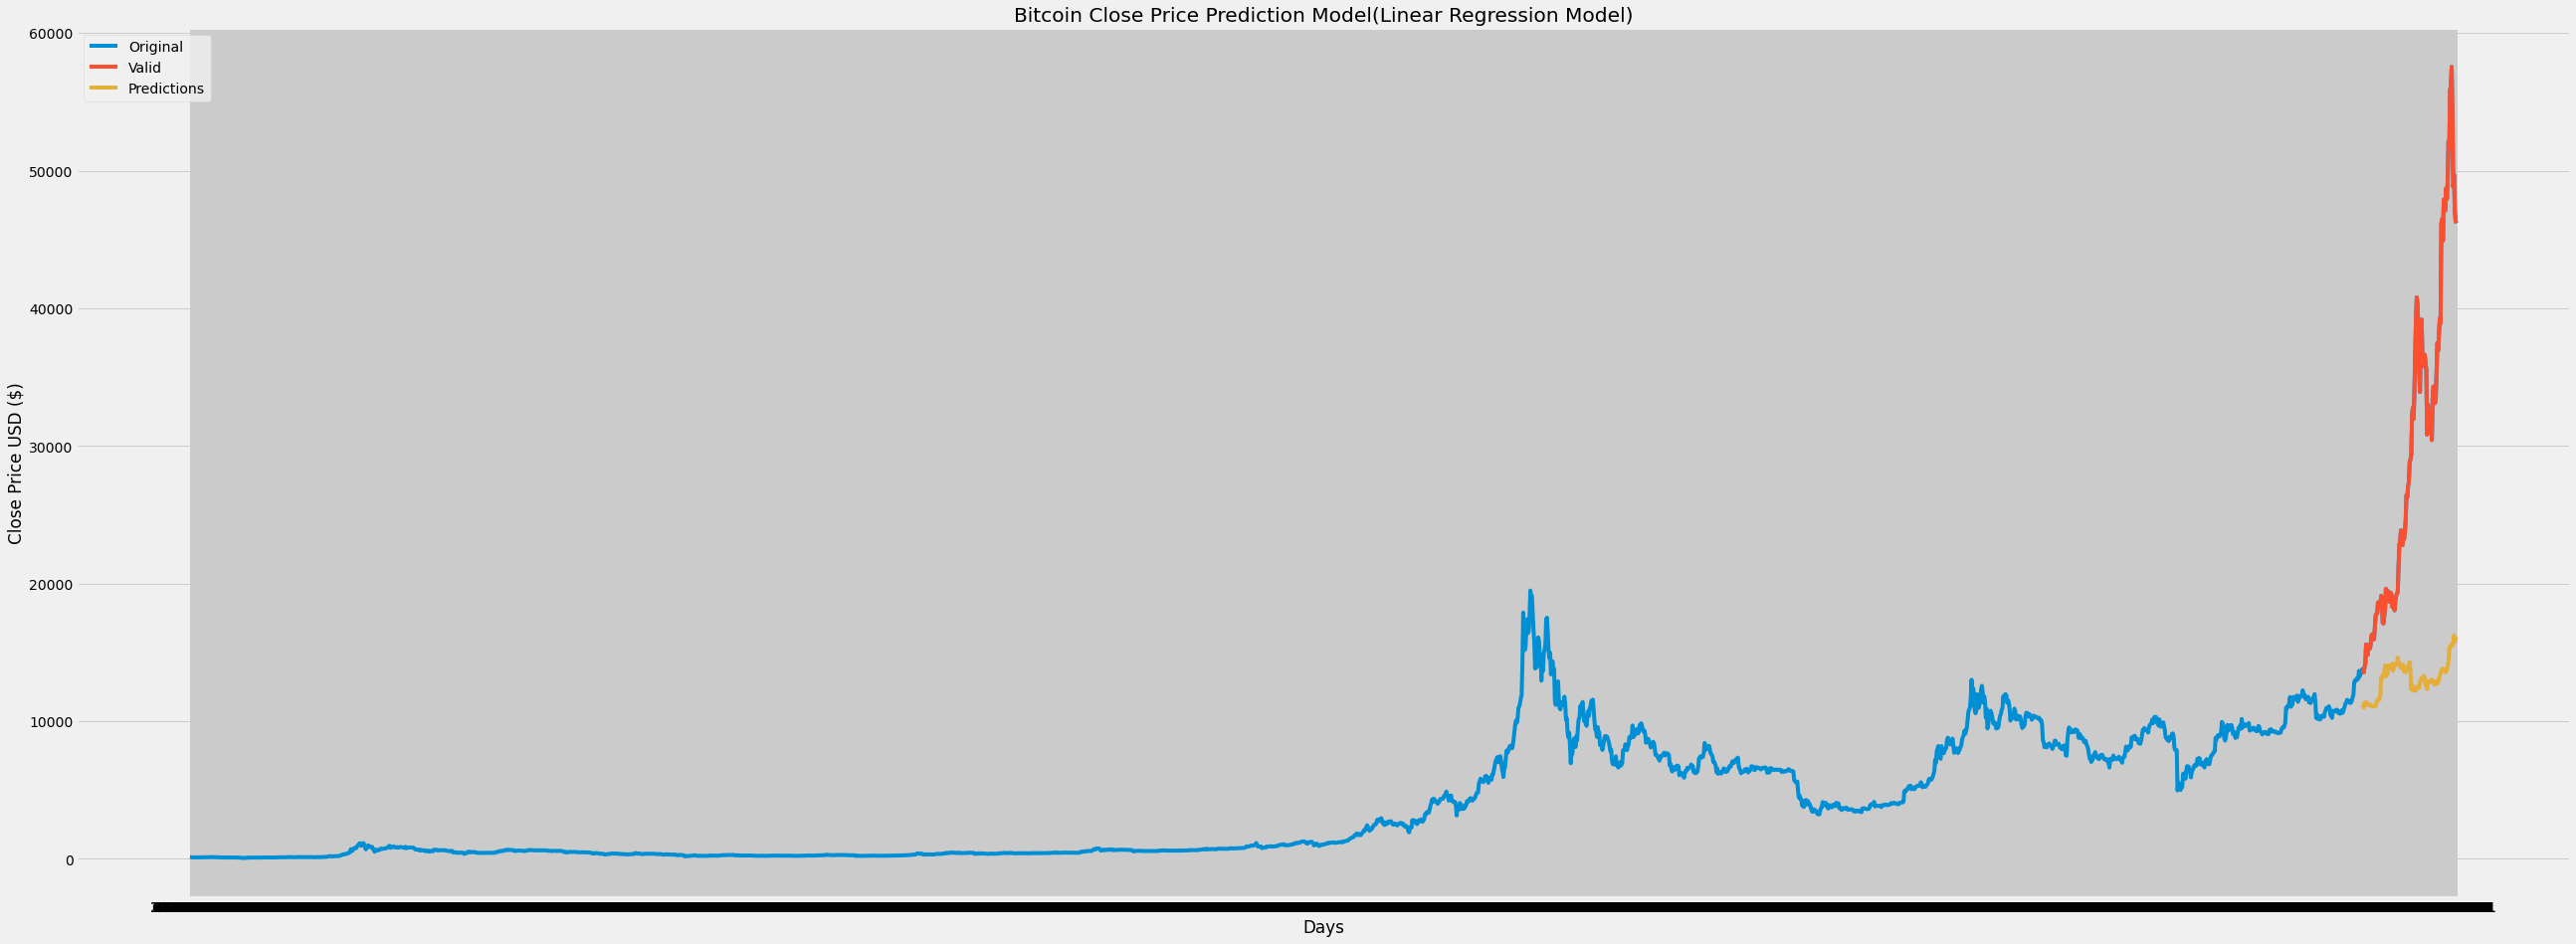

In [19]:
predictions = linearPrediction
valid = btc[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40, 15))
plt.title("Bitcoin Close Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(btc["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

<ipython-input-20-9baef3e164a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


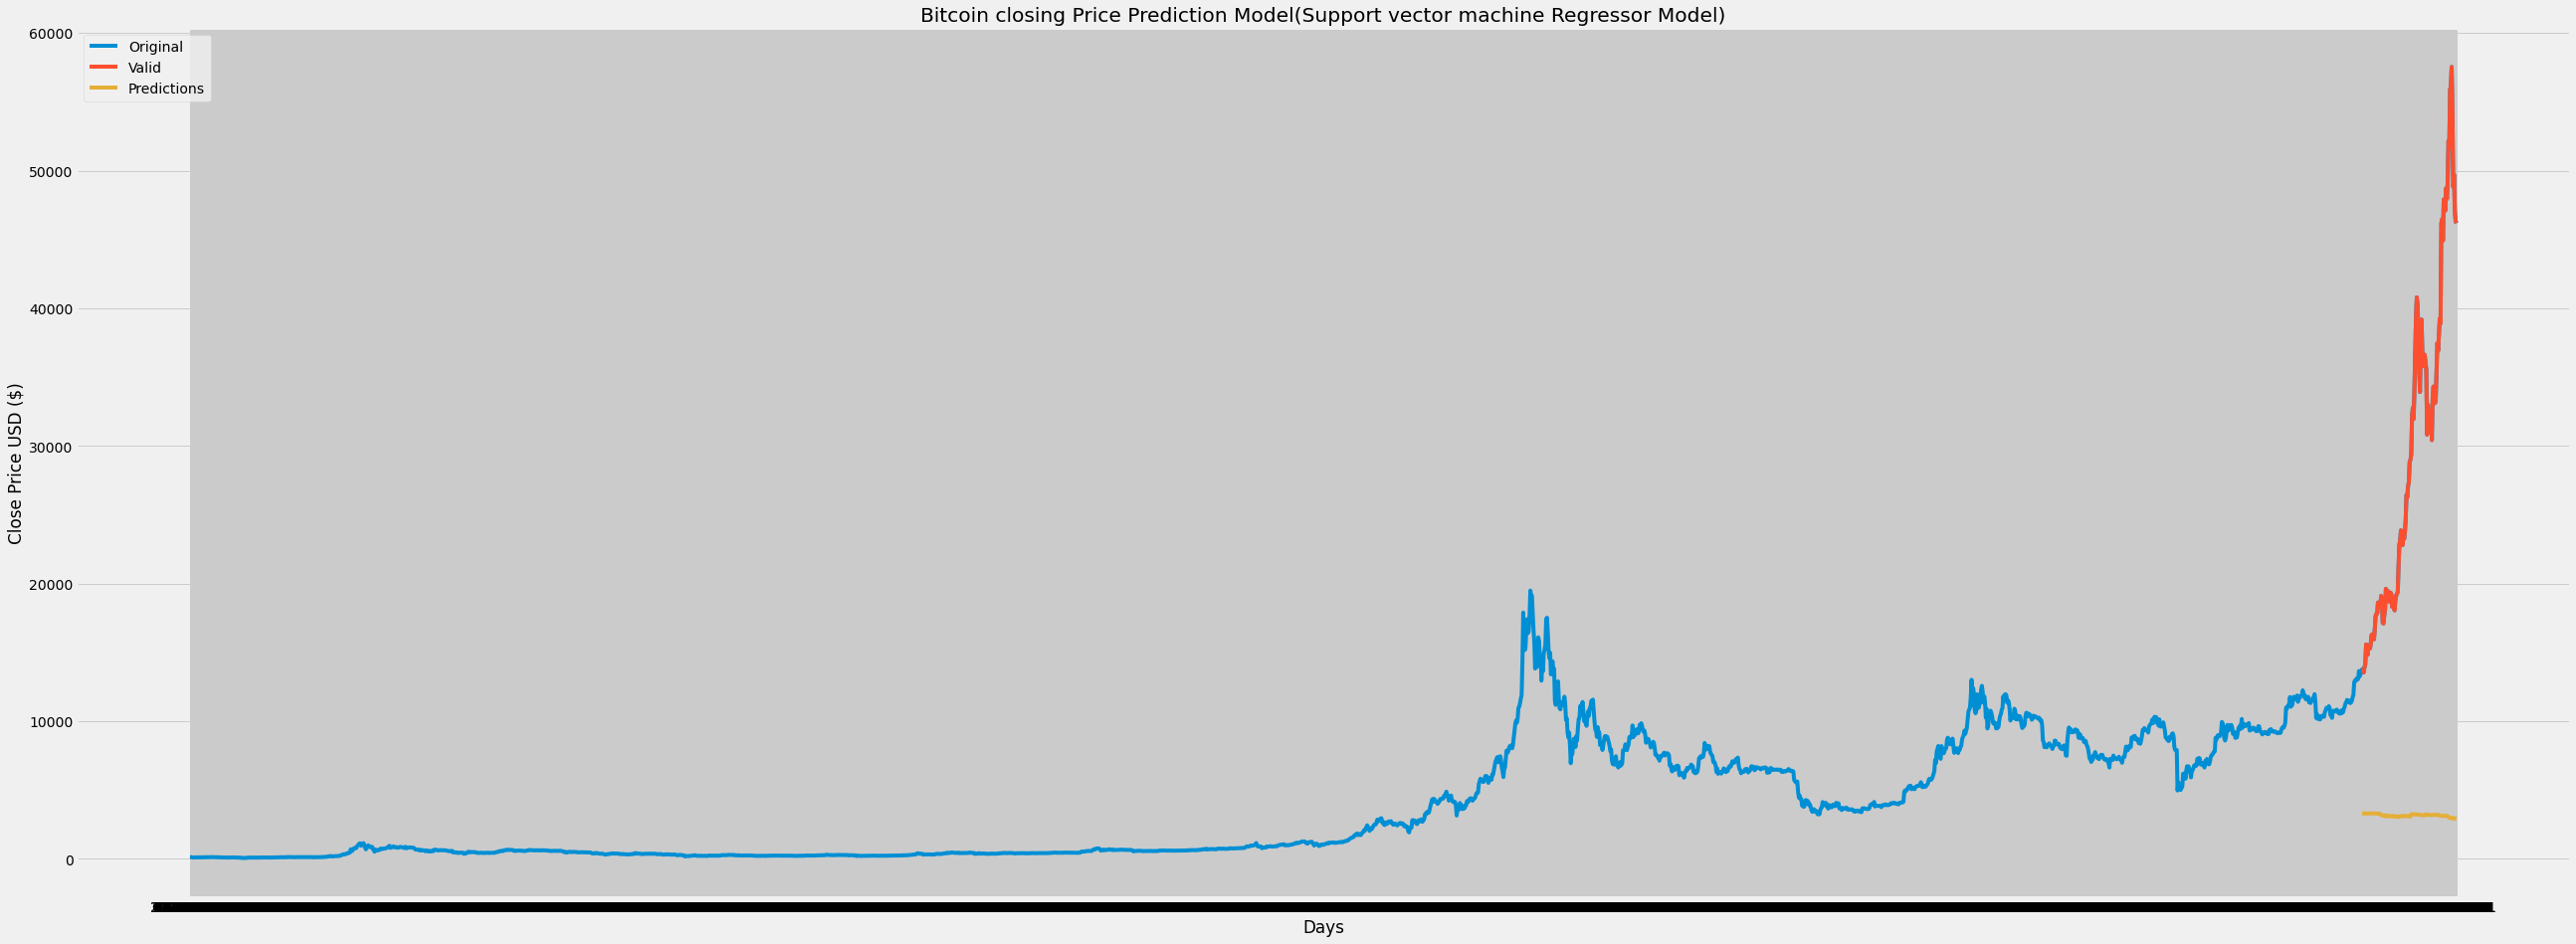

In [20]:
predictions =svmPrediction
valid = btc[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Bitcoin closing Price Prediction Model(Support vector machine Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(btc["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, accuracy_score as asc,r2_score
from math import sqrt


In [53]:
mse = mean_squared_error(xfuture,svmPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable and its range will in lieu to the variable 
#as we can see the value is not small but not that large in range 0 to 1 the model has average fit

RMSE:  7882.240113098683


In [51]:
mse = mean_squared_error(xfuture,treePrediction)
rmse = sqrt(mse)
print('RMSE:',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is large in range 0 to 1 the model is not a good fit


RMSE: 19033.180364157834


In [52]:
mse = mean_squared_error(xfuture,linearPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is small in range 0 to 1 the model has a good fit


RMSE:  2193.7805162308073
